<a href="https://colab.research.google.com/github/khadi1/machine_learning_practice/blob/main/enumerating_epochs_and_batches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


cifar10 dataset<br> 
60,000 32×32 pixel images divided into 10 classes.<br>
0: airplane<br>
1: automobile<br>
2: bird<br>
3: cat<br>
4: deer<br>
5: dog<br>
6: frog<br>
7: horse<br>
8: ship<br>
9: truck<br>

In [66]:
import matplotlib.pyplot as plt
from keras.models  import Sequential 
from keras.layers import BatchNormalization 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

import time
from numpy.random import randn
from numpy.random import randint

In [67]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

In [70]:
rand_train_images = randint(0,X_train.shape[0] , 5000)
rand_test_images = randint(0,X_train.shape[0] , 1000)

In [71]:
X_train = X_train[rand_train_images]
y_train = y_train[rand_train_images]
X_test = X_test[rand_test_images]
y_test = y_test[rand_test_images]

In [72]:
X_train= normalize(X_train, axis  = 1)
X_train= normalize(X_train, axis  = 1)

In [73]:
y_train[0] , y_test[0]

(array([4], dtype=uint8), array([4], dtype=uint8))

In [74]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [75]:
y_train[0] , y_test[0]

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [76]:
X_train[0].shape

(32, 32, 3)

# Model Building



In [77]:
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32 , 3 , activation = activation , padding = 'same' , input_shape = (32, 32, 3) ))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))



In [78]:
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy'  ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [79]:
model1 = model 

In [80]:
history = model.fit(X_train , y_train , epochs= 10 , batch_size = 16 , validation_data = (X_test , y_test))

Epoch 1/10
313/313 [==============================] - 49s 138ms/step - loss: 1.8129 - accuracy: 0.3662 - val_loss: 2.3701 - val_accuracy: 0.2520
Epoch 2/10
313/313 [==============================] - 39s 124ms/step - loss: 1.2938 - accuracy: 0.5578 - val_loss: 2.1091 - val_accuracy: 0.3080
Epoch 3/10
313/313 [==============================] - 40s 129ms/step - loss: 0.9650 - accuracy: 0.6800 - val_loss: 2.4096 - val_accuracy: 0.2970
Epoch 4/10
313/313 [==============================] - 39s 124ms/step - loss: 0.7057 - accuracy: 0.7864 - val_loss: 2.3079 - val_accuracy: 0.2900
Epoch 5/10
313/313 [==============================] - 40s 129ms/step - loss: 0.4638 - accuracy: 0.8714 - val_loss: 2.5505 - val_accuracy: 0.3000
Epoch 6/10
313/313 [==============================] - 39s 125ms/step - loss: 0.2930 - accuracy: 0.9258 - val_loss: 2.8700 - val_accuracy: 0.2860
Epoch 7/10
313/313 [==============================] - 39s 124ms/step - loss: 0.1755 - accuracy: 0.9624 - val_loss: 3.2283 - val_ac

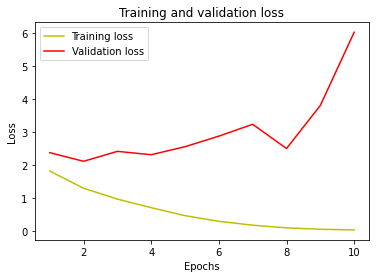

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 , len(loss)+1 )
plt.plot(epochs , loss , 'y' , label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

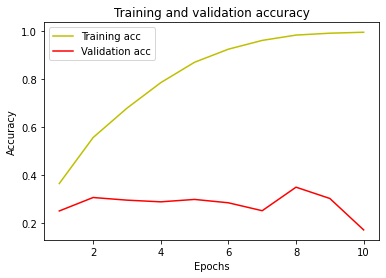

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Training using epoch and batch enumeration

In [83]:
def fetch_batch(X, y, batch_size, batch):
    start = batch*batch_size
    
    X_batch = X[start:start+batch_size, :, :]
    y_batch = y[start:start+batch_size, :]
    
    return X_batch, y_batch

In [84]:

batch_size = 16
loss_history = []
val_loss_history = []
acc_history = []
val_acc_history = []
n_epochs = 10

In [85]:
from tqdm import tqdm
from sklearn.utils import shuffle

In [86]:
for epoch in range(n_epochs):
    X, y = shuffle(X_train, y_train, random_state = epoch**2)
    for batch in tqdm(range(len(X_train) //batch_size)):
    
        X_batch, y_batch = fetch_batch(X, y, batch_size, batch)
        loss, acc = model1.train_on_batch(X_batch, y_batch)
    
    loss_history.append(loss)
    acc_history.append(acc)
    
    # Run validtion at the end of each epoch.
    y_pred = model1.predict(X_test)
    val_loss, val_acc = model1.evaluate(X_test, y_test)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
        

100%|██████████| 312/312 [00:39<00:00,  7.96it/s]


32/32 [==============================] - 2s 58ms/step - loss: 4.9581 - accuracy: 0.2170


100%|██████████| 312/312 [00:40<00:00,  7.76it/s]


32/32 [==============================] - 2s 58ms/step - loss: 4.2638 - accuracy: 0.2650


100%|██████████| 312/312 [00:39<00:00,  7.97it/s]


32/32 [==============================] - 2s 57ms/step - loss: 5.4052 - accuracy: 0.2500


100%|██████████| 312/312 [00:39<00:00,  7.98it/s]


32/32 [==============================] - 2s 57ms/step - loss: 4.2537 - accuracy: 0.3130


100%|██████████| 312/312 [00:39<00:00,  8.00it/s]


32/32 [==============================] - 3s 81ms/step - loss: 4.4869 - accuracy: 0.3180


100%|██████████| 312/312 [00:38<00:00,  8.04it/s]


32/32 [==============================] - 2s 59ms/step - loss: 5.0265 - accuracy: 0.3010


100%|██████████| 312/312 [00:38<00:00,  8.06it/s]


32/32 [==============================] - 2s 58ms/step - loss: 4.8702 - accuracy: 0.3000


100%|██████████| 312/312 [00:39<00:00,  7.97it/s]


32/32 [==============================] - 2s 58ms/step - loss: 6.8123 - accuracy: 0.2300


100%|██████████| 312/312 [00:40<00:00,  7.80it/s]


32/32 [==============================] - 2s 59ms/step - loss: 5.9893 - accuracy: 0.2880


100%|██████████| 312/312 [00:39<00:00,  7.89it/s]


32/32 [==============================] - 2s 59ms/step - loss: 8.1067 - accuracy: 0.2330


In [87]:
print('Epoch: %d, Train Loss %.3f, Train Acc. %.3f, Val Loss %.3f, Val Acc. %.3f' %
			(epoch+1, loss, acc, val_loss, val_acc))

Epoch: 10, Train Loss 0.000, Train Acc. 1.000, Val Loss 8.107, Val Acc. 0.233


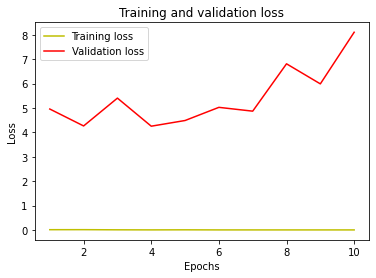

In [88]:

epochs = range(1, len(loss_history) + 1)

plt.plot(epochs, loss_history, 'y', label='Training loss')
plt.plot(epochs, val_loss_history, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

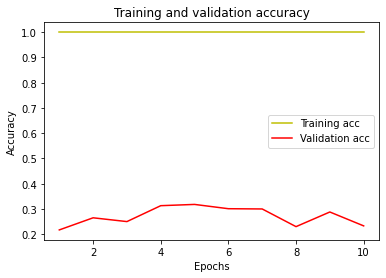

In [89]:
plt.plot(epochs, acc_history, 'y', label='Training acc')
plt.plot(epochs, val_acc_history, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()